In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

def get_k_sphere(n_points):
    # Get an array of n_points on a sphere of radius 1
    # shape (n_points)
    n_theta=int(np.sqrt(n_points)*np.sqrt(2))
    n_phi=int(n_points/n_theta)
    thetas = np.linspace(0, 2*np.pi, n_theta)
    phis = np.linspace(0, np.pi, n_phi)
    theta_grid, phi_grid = np.meshgrid(thetas, phis)
    xgrid=np.sin(phi_grid) * np.cos(theta_grid)
    ygrid=np.sin(phi_grid) * np.sin(theta_grid)
    zgrid = np.cos(phi_grid)
    
    points = np.stack([xgrid, ygrid, zgrid], axis=-1).reshape(-1, 3)  # Shape (N, 3)
    return points,xgrid,ygrid,zgrid,theta_grid,phi_grid

def make_symmetry_operation(rotation=np.eye(3),translation=np.zeros(3),time_reversal=False):
    rotation_tr=rotation
    if time_reversal:
        rotation_tr=-1*rotation
    def sym_op(p):
        return rotation_tr @ p
    return sym_op

def compare(a,b,tol=1e-3):
    return np.linalg.norm(a-b)
    
def score_invariantness_points(k_points,symmetry_operations):
    distances_from_invariant=[]

    for k_point in k_points:
        invariant=False
        distance_from_invariant=np.inf
        for symmetry_operation in symmetry_operations.values():
            k_point_symmetry=symmetry_operation(k_point)
            if (dist:=np.linalg.norm(k_point_symmetry-k_point))<distance_from_invariant:
                distance_from_invariant=dist
        distances_from_invariant.append(distance_from_invariant)
    return np.array(distances_from_invariant)


In [98]:
%matplotlib widget
points,xgrid,ygrid,zgrid,theta_grid,phi_grid=get_k_sphere(5000)

# All antiunitary operations in Pbnm with G-type AF
symmetry_operations_antiunitary={}
symmetry_operations_antiunitary['03_ScrewX']=make_symmetry_operation(np.array([[1,0,0],[0,-1,0],[0,0,-1]]),np.array([1/2,1/2,0]),time_reversal=True)
symmetry_operations_antiunitary['04_MirrorXTransXY']=make_symmetry_operation(np.array([[-1,0,0],[0,1,0],[0,0,1]]),np.array([1/2,1/2,0]),time_reversal=True)
symmetry_operations_antiunitary['05_ScrewZ']=make_symmetry_operation(np.array([[-1,0,0],[0,-1,0],[0,0,1]]),np.array([0,0,1/2]),time_reversal=True)
symmetry_operations_antiunitary['06_MirrorZTransZ']=make_symmetry_operation(np.array([[1,0,0],[0,1,0],[0,0,-1]]),np.array([0,0,1/2]),time_reversal=True)

distances_from_invariant = score_invariantness_points(points,symmetry_operations_antiunitary)

splitting_grid = distances_from_invariant.reshape(phi_grid.shape)
radius = splitting_grid  # interpreted as the deformed radius

# Apply deformation
x_deformed = radius * xgrid
y_deformed = radius * ygrid
z_deformed = radius * zgrid
# fig=plt.figure()
# ax=fig.add_subplot(projection='3d')
# # ax.scatter(points[:,0],points[:,1],points[:,2])
# ax.plot_trisurf(points[:,0],points[:,1],points[:,2], cmap='coolwarm', linewidth=0.2)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

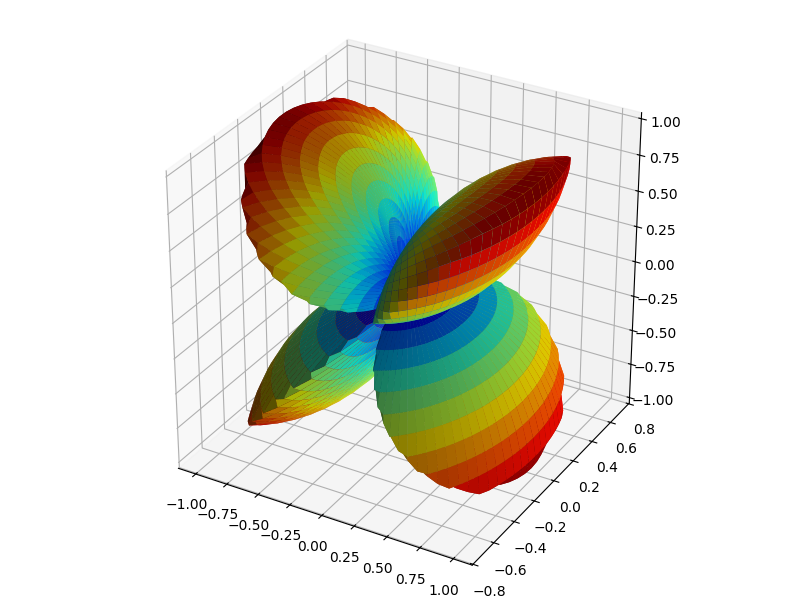

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_deformed, y_deformed, z_deformed,
                facecolors=plt.cm.jet((radius - radius.min()) / radius.ptp()),
                rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()